In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv("./data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [194]:
df.shape

(1000, 8)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [196]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [197]:
df.duplicated().sum()

0

In [198]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [199]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [200]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [201]:
# disect numerical and categorical columns
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical Columns present in dataset are: {numerical_cols}")
print(f"Categorical Columns present in dataset are: {categorical_cols}")

Numerical Columns present in dataset are: ['math_score', 'reading_score', 'writing_score']
Categorical Columns present in dataset are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [202]:
# Unique values present in each categorical_cols
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


#### Feature Construction: Creating Totals and Avg. Score from numerical cols

In [204]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["avg_score"] = df["total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


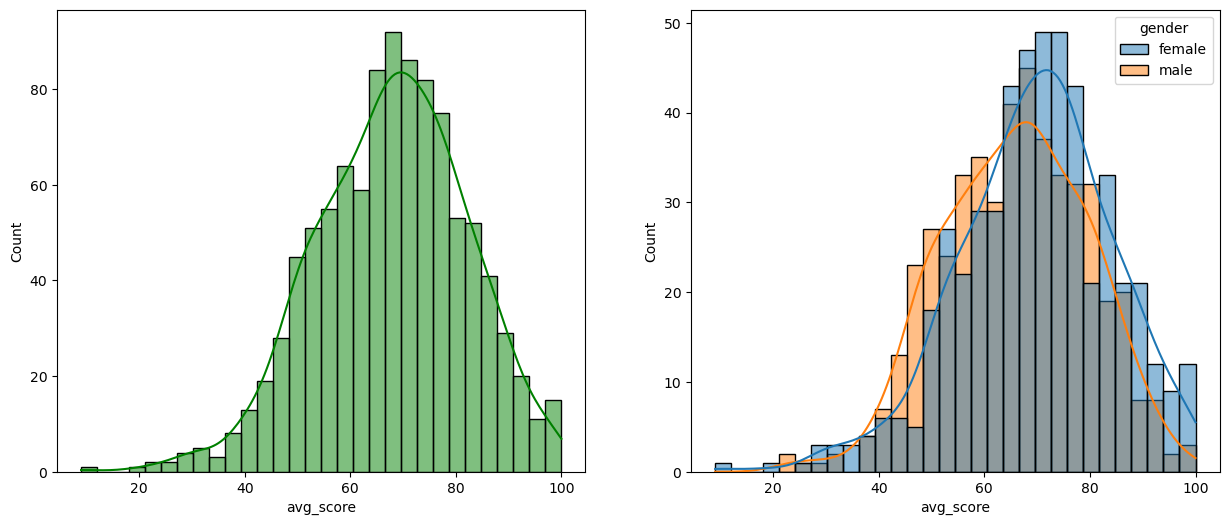

In [205]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
plt.subplot(121)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='avg_score', bins=30, kde=True, hue='gender')
plt.show()

<h3>Model Training</h3>


In [207]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [230]:
# input and Output labels
y = df['math_score']
X = df.drop(columns=['math_score'], axis=1)

In [232]:
X.shape, y.shape

((1000, 9), (1000,))

In [234]:
preprocessor = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(), categorical_cols),
    ('StandardScaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [242]:
X_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,avg_score
976,male,group B,some college,free/reduced,completed,62,60,182,60.666667
668,male,group C,some college,standard,none,74,61,208,69.333333
836,male,group E,high school,standard,none,64,57,194,64.666667
479,male,group E,associate's degree,standard,none,71,67,214,71.333333
83,male,group E,associate's degree,standard,none,64,63,199,66.333333
...,...,...,...,...,...,...,...,...,...
80,female,group B,associate's degree,standard,none,49,50,146,48.666667
994,male,group A,high school,standard,none,63,62,188,62.666667
908,female,group C,bachelor's degree,free/reduced,none,75,72,214,71.333333
931,male,group D,some college,free/reduced,none,57,62,181,60.333333


In [248]:
X_train_preprocessed = preprocessor.fit_transform(X_train).values()
X_train_preprocessed

ValueError: A given column is not a column of the dataframe